# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    params = {
        'units': units,
        'appid': weather_api_key,
        'q': city
    }
    #city_url = # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url, params=params).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | valparaiso
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | afaahiti
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | carbonear
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | tangalle
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | sonoita
Processing Record 13 of Set 1 | buncrana
Processing Record 14 of Set 1 | muravlenko
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | kiunga
Processing Record 17 of Set 1 | lerwick
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | karaton
Processing Record 20 of Set 1 | swift current
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | utrik
Processing Rec

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,18.22,82,20,5.81,PT,1706896951
1,valparaiso,-33.0393,-71.6273,38.41,35,8,6.69,CL,1706896804
2,port-aux-francais,-49.3500,70.2167,8.07,96,92,7.32,TF,1706896951
3,adamstown,-25.0660,-130.1015,24.63,84,33,4.95,PN,1706896951
4,afaahiti,-17.7500,-149.2833,27.93,72,85,4.48,PF,1706896952


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,18.22,82,20,5.81,PT,1706896951
1,valparaiso,-33.0393,-71.6273,38.41,35,8,6.69,CL,1706896804
2,port-aux-francais,-49.3500,70.2167,8.07,96,92,7.32,TF,1706896951
3,adamstown,-25.0660,-130.1015,24.63,84,33,4.95,PN,1706896951
4,afaahiti,-17.7500,-149.2833,27.93,72,85,4.48,PF,1706896952


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

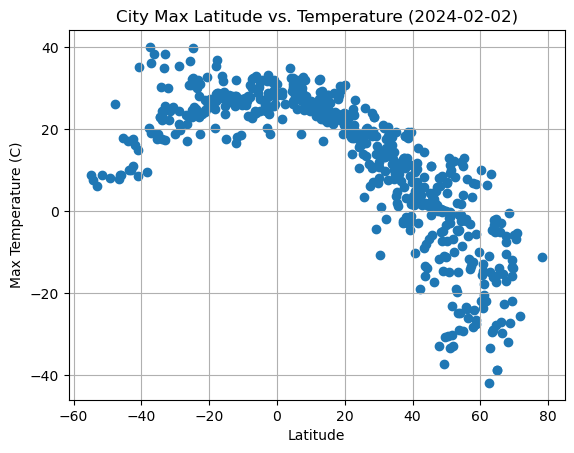

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Max Latitude vs. Temperature ({time.strftime("%Y-%m-%d", time.localtime())})')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

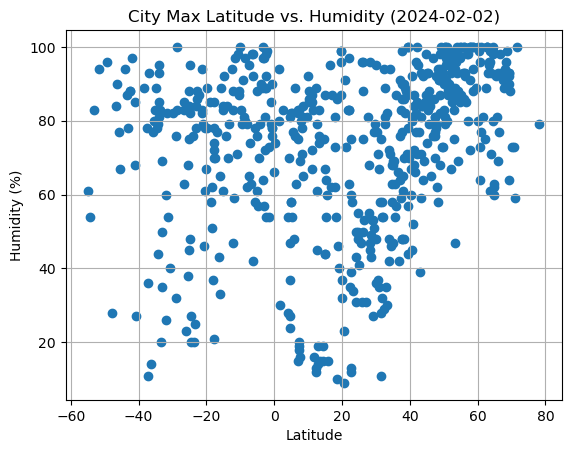

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Max Latitude vs. Humidity ({time.strftime("%Y-%m-%d", time.localtime())})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

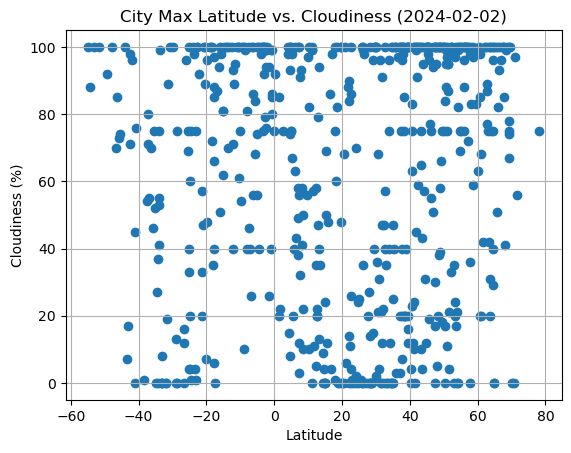

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Max Latitude vs. Cloudiness ({time.strftime("%Y-%m-%d", time.localtime())})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

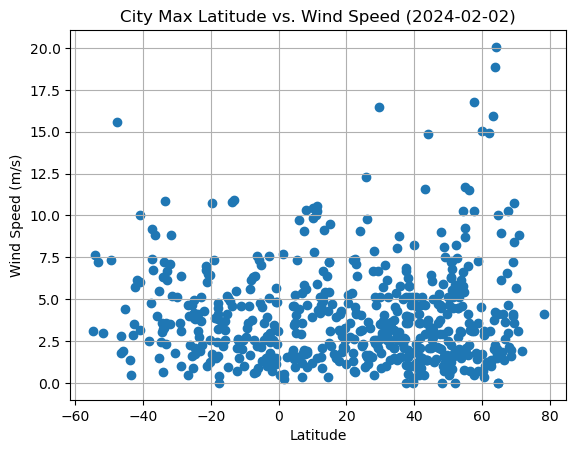

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Max Latitude vs. Wind Speed ({time.strftime("%Y-%m-%d", time.localtime())})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def calc_linear_reg(xvals, yvals):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvals, yvals)
    regress_values = xvals * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return {'line_eq': line_eq, 'rvalue': rvalue, 'regress': regress_values}

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,18.22,82,20,5.81,PT,1706896951
5,yellowknife,62.4560,-114.3525,-10.95,89,100,3.09,CA,1706896852
6,qaqortoq,60.7167,-46.0333,-14.47,73,98,0.36,GL,1706896952
7,carbonear,47.7332,-53.2148,0.64,78,100,2.95,CA,1706896952
8,albany,42.6001,-73.9662,3.82,77,100,1.34,US,1706896803


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,valparaiso,-33.0393,-71.6273,38.41,35,8,6.69,CL,1706896804
2,port-aux-francais,-49.3500,70.2167,8.07,96,92,7.32,TF,1706896951
3,adamstown,-25.0660,-130.1015,24.63,84,33,4.95,PN,1706896951
4,afaahiti,-17.7500,-149.2833,27.93,72,85,4.48,PF,1706896952
10,margaret river,-33.9500,115.0667,17.68,93,53,3.29,AU,1706896953


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8497859026250333


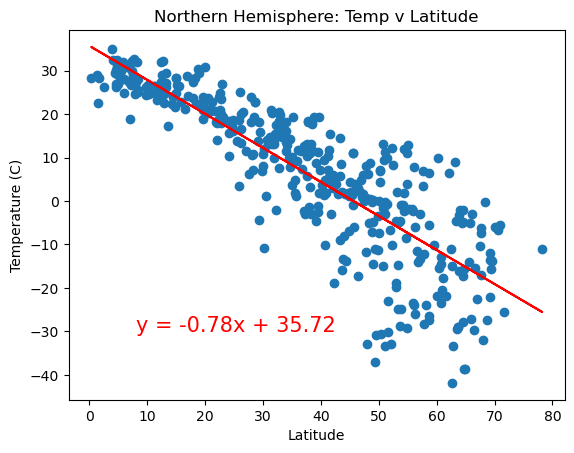

In [50]:
# Linear regression on Northern Hemisphere
xvals = northern_hemi_df['Lat']
yvals = northern_hemi_df['Max Temp']

reg_details = calc_linear_reg(xvals, yvals)

print(f'The r-value is: {reg_details["rvalue"]}')
plt.scatter(xvals,yvals)
plt.plot(xvals,reg_details['regress'],"r-")
plt.annotate(reg_details['line_eq'], (8,-30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Northern Hemisphere: Temp v Latitude')
plt.show()

The r-value is: 0.5069126401725964


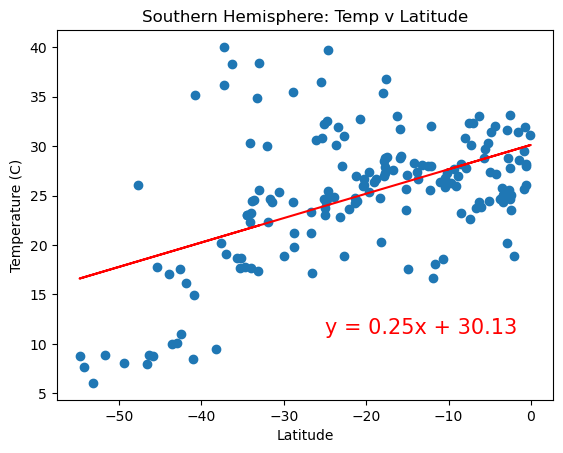

In [51]:
# Linear regression on Southern Hemisphere
xvals = southern_hemi_df['Lat']
yvals = southern_hemi_df['Max Temp']

reg_details = calc_linear_reg(xvals, yvals)

print(f'The r-value is: {reg_details["rvalue"]}')
plt.scatter(xvals,yvals)
plt.plot(xvals,reg_details['regress'],"r-")
plt.annotate(reg_details['line_eq'], (-25,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Southern Hemisphere: Temp v Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.5019528636810182


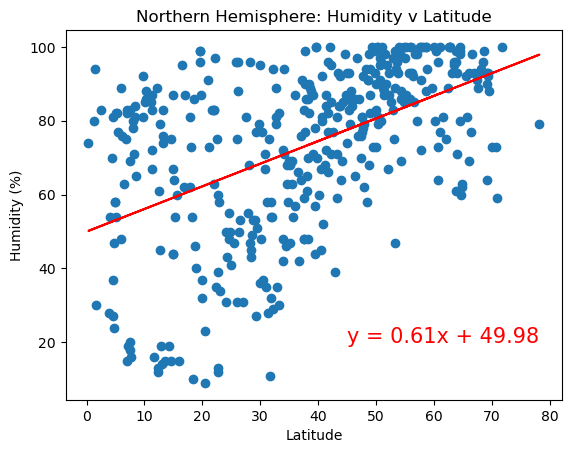

In [52]:
# Northern Hemisphere
xvals = northern_hemi_df['Lat']
yvals = northern_hemi_df['Humidity']

reg_details = calc_linear_reg(xvals, yvals)

print(f'The r-value is: {reg_details["rvalue"]}')
plt.scatter(xvals,yvals)
plt.plot(xvals,reg_details['regress'],"r-")
plt.annotate(reg_details['line_eq'], (45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Humidity v Latitude')
plt.show()

The r-value is: 0.16395514035429354


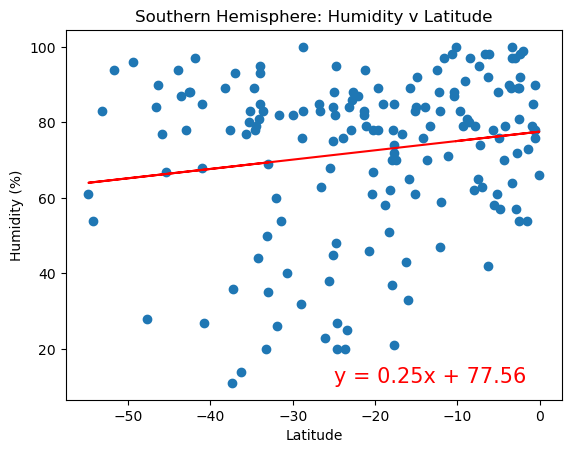

In [59]:
# Southern Hemisphere
xvals = southern_hemi_df['Lat']
yvals = southern_hemi_df['Humidity']

reg_details = calc_linear_reg(xvals, yvals)

print(f'The r-value is: {reg_details["rvalue"]}')
plt.scatter(xvals,yvals)
plt.plot(xvals,reg_details['regress'],"r-")
plt.annotate(reg_details['line_eq'], (-25,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Humidity v Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.24496765161309375


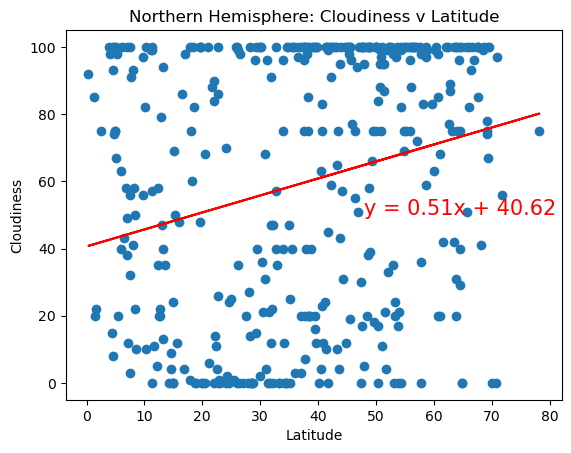

In [58]:
# Northern Hemisphere
xvals = northern_hemi_df['Lat']
yvals = northern_hemi_df['Cloudiness']

reg_details = calc_linear_reg(xvals, yvals)

print(f'The r-value is: {reg_details["rvalue"]}')
plt.scatter(xvals,yvals)
plt.plot(xvals,reg_details['regress'],"r-")
plt.annotate(reg_details['line_eq'], (48,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Cloudiness v Latitude')
plt.show()

The r-value is: 0.27057129697870974


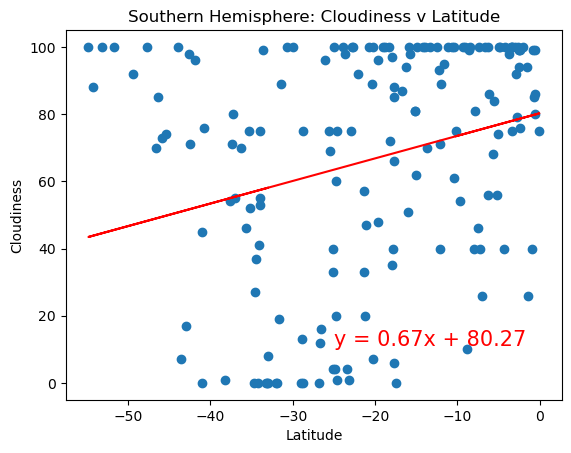

In [60]:
# Southern Hemisphere
xvals = southern_hemi_df['Lat']
yvals = southern_hemi_df['Cloudiness']

reg_details = calc_linear_reg(xvals, yvals)

print(f'The r-value is: {reg_details["rvalue"]}')
plt.scatter(xvals,yvals)
plt.plot(xvals,reg_details['regress'],"r-")
plt.annotate(reg_details['line_eq'], (-25,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Cloudiness v Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05989238801678559


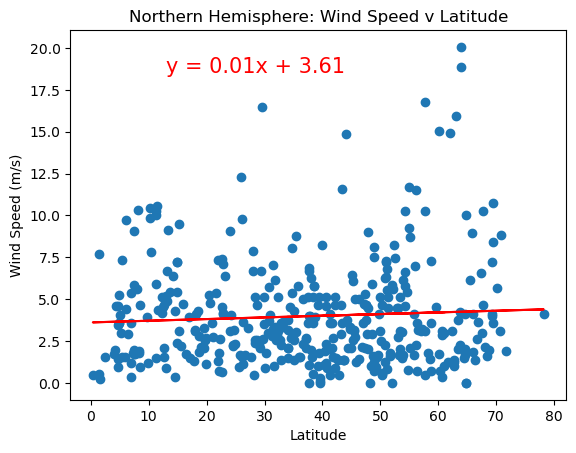

In [62]:
# Northern Hemisphere
xvals = northern_hemi_df['Lat']
yvals = northern_hemi_df['Wind Speed']

reg_details = calc_linear_reg(xvals, yvals)

print(f'The r-value is: {reg_details["rvalue"]}')
plt.scatter(xvals,yvals)
plt.plot(xvals,reg_details['regress'],"r-")
plt.annotate(reg_details['line_eq'], (13,18.5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere: Wind Speed v Latitude')
plt.show()

The r-value is: -0.2568007183301454


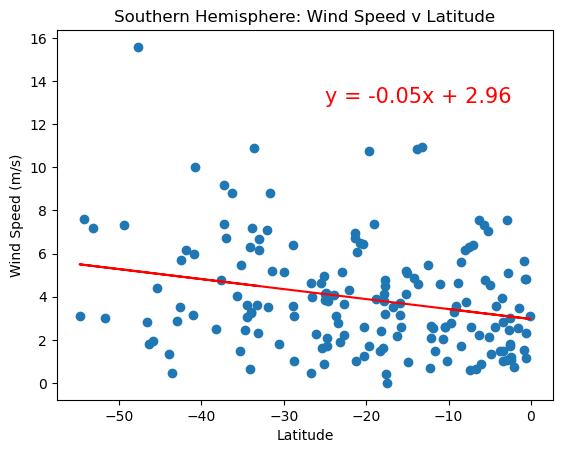

In [63]:
# Southern Hemisphere
xvals = southern_hemi_df['Lat']
yvals = southern_hemi_df['Wind Speed']

reg_details = calc_linear_reg(xvals, yvals)

print(f'The r-value is: {reg_details["rvalue"]}')
plt.scatter(xvals,yvals)
plt.plot(xvals,reg_details['regress'],"r-")
plt.annotate(reg_details['line_eq'], (-25,13),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere: Wind Speed v Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE